Github-like calendar plots that show some aggregate daily value (e.g. count, distance, duration) using [calmap](https://pythonhosted.org/calmap/)

In [1]:
import os
import pylab as pl
import numpy as np
import pandas as pd
import calmap
import sportdata.io.tcx as tcx
%matplotlib inline

In [2]:
# Directory where to find .tcx files
DATA_DIR = '../../garmin_data'

In [3]:
tcx_files = [os.path.join(DATA_DIR, fname) for fname in os.listdir(DATA_DIR) if fname.endswith('.tcx')]
print len(tcx_files)

242


In [4]:
activities = [tcx.load_activity(fname) for fname in tcx_files]

In [5]:
def calmap_daily_value(df, fill_value=0):
    """Accumulate daily values and plot a calmap"""
    date_from = df.index.date.min()
    date_to = df.index.date.max()

    rng = pd.date_range(date_from.strftime('%Y-%m-%d'), date_to.strftime('%Y-%m-%d'), freq='D')

    daily_values = df.groupby(df.index.date).sum()
    # fill missing dates with 0
    daily_values = daily_values.reindex(rng, fill_value=fill_value)
    
    # plot
    fig = pl.figure(figsize=(12, 6))
    calmap.calendarplot(daily_values, fig_kws={'num' : fig.number})

# Daily activity counts

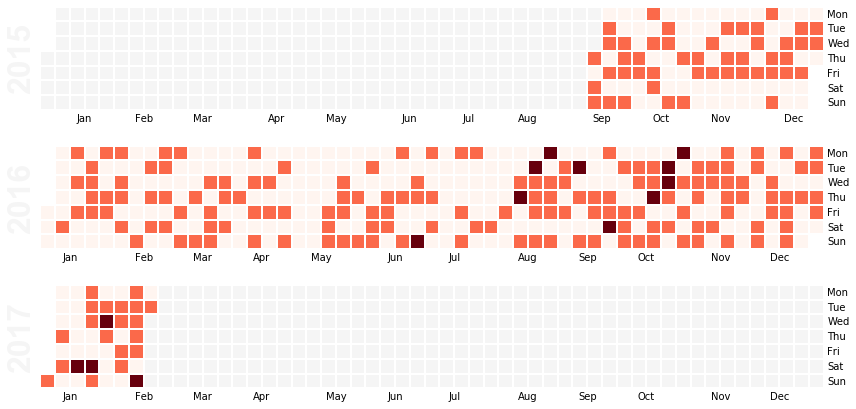

In [7]:
act_times = [activity.time for activity in activities]
df = pd.Series(np.ones(len(act_times)), index=act_times)
calmap_daily_value(df)

# Daily activity duration

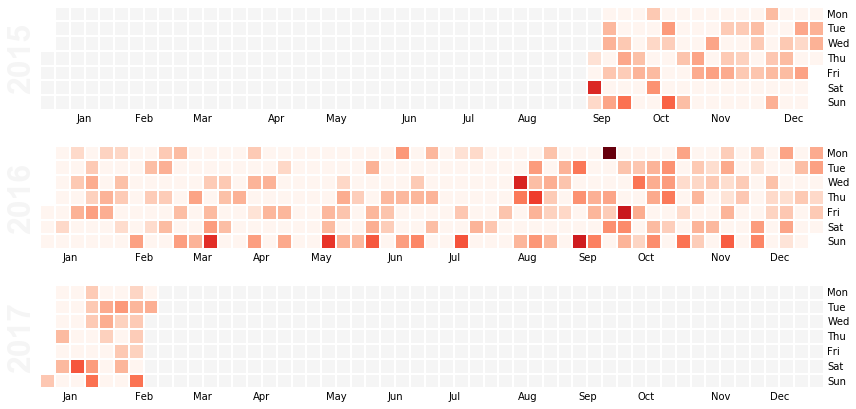

In [8]:
def activity_duration(activity):
    return np.sum([lap.duration for lap in activity.laps])
times = np.array([activity.time for activity in activities])
durations = np.array(map(activity_duration, activities))
df = pd.Series(durations, index=times)
calmap_daily_value(df)

# Daily activity distance

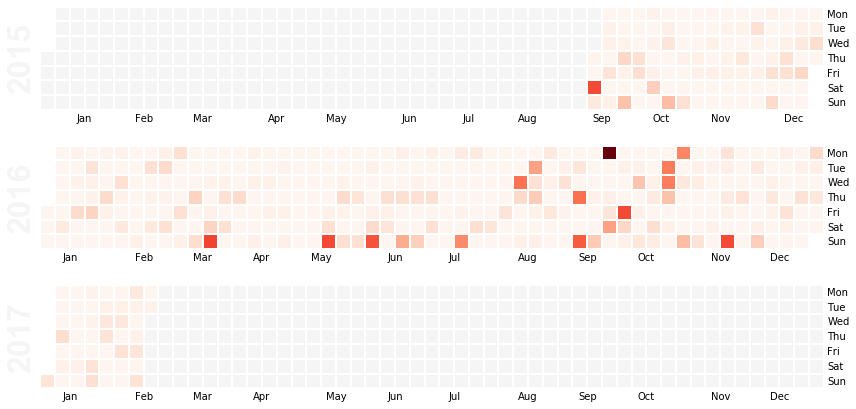

In [9]:
def activity_duration(activity):
    return np.sum([lap.distance for lap in activity.laps])
times = np.array([activity.time for activity in activities])
durations = np.array(map(activity_duration, activities))
df = pd.Series(durations, index=times)
calmap_daily_value(df)